<p align="center">
  <h1 align="center">Recipe recommendation system</h1>
  <h4 align="center">
    <strong>Jelle Huibregtse</strong> and <strong>Aron Hemmes</strong>
  </h4>
</p>

## The Assignment
The goal is to ultimately create a personalized recipe recommendation system that learns from the choices of its users.

### Loading in some libraries

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = 10, 5

## Exploratory Data Analysis (EDA)
First, we import the cleaned datasets from the previous notebook (DCA).

### The ingredient dataset
The first dataset is the ingredient dataset:

In [2]:
df_ingredient = pd.read_csv('export/ingredient.csv')
# Set the index to ingredient id.
df_ingredient = df_ingredient.set_index('ingredient_id')
df_ingredient.head()

,category,name,plural
ingredient_id,,,
1,dairy,1% lowfat cottage cheese,NaN
6,dairy,1% lowfat milk,NaN
10,Mexican products,10-inch flour tortilla,s
11,cereals,100% bran cereal,NaN
12,dairy,2% lowfat milk,NaN


To get an overview of the different categories we can visualize this in a barchart.

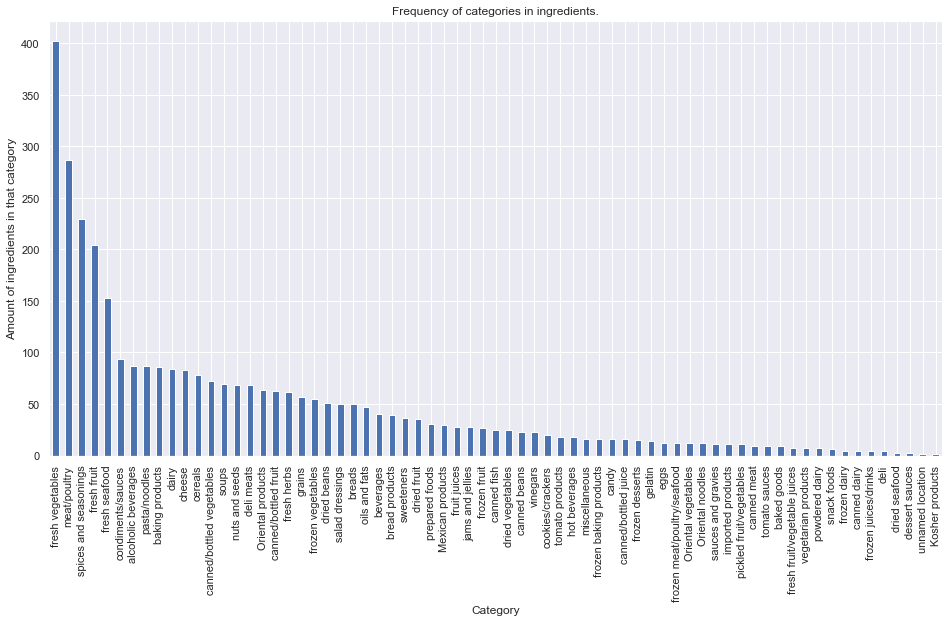

In [3]:
category_plot = df_ingredient.category.value_counts().plot(kind='bar',figsize=(16,8),title="Frequency of categories in ingredients.")
category_plot.set_xlabel("Category")
category_plot.set_ylabel("Amount of ingredients in that category");

In [4]:
df_quantity = pd.read_csv('export/quantity.csv')
# Set the index to ingredient id.
df_quantity = df_quantity.set_index('quantity_id')
df_quantity.head()

,recipe_id,ingredient_id,max_qty,min_qty,unit,preparation,optional
quantity_id,,,,,,,
1,214,1613,2.00,2.00,cup(s),NaN,False
2,214,3334,0.25,0.25,cup(s),NaN,False
3,214,2222,0.50,0.50,cup(s),melted,False
4,214,2797,0.25,0.25,cup(s),or water,False
5,214,3567,3.00,3.00,teaspoon(s),NaN,False


In [5]:
df_recipe = pd.read_csv('export/recipe.csv')
# Set the index to ingredient id.
df_recipe = df_recipe.set_index('recipe_id')
df_recipe.head()

,title,subtitle,servings,yield_unit,prep_min,cook_min,total_min,stnd_min,intro,directions,...,cholestrl,sodium,iron,vitamin_c,vitamin_a,fiber,pcnt_cal_carb,pcnt_cal_fat,pcnt_cal_prot,calories
recipe_id,,,,,,,,,,,,,,,,,,,,,
214,Raspberry Chiffon Pie,NaN,10,1 pie,20,8,28,305,NaN,"For crust, preheat oven to 375 degrees F.\nIn...",...,1.39,260.78,0.81,8.89,586.20,0.87,56.80,35.68,7.53,290.79
215,Apricot Yogurt Parfaits,NaN,4,NaN,5,2,7,65,NaN,"Drain canned apricots, pour 1/4 cup of the ju...",...,3.48,46.17,0.57,13.02,2738.24,0.62,67.38,6.89,16.17,141.01
216,Fresh Apricot Bavarian,NaN,8,NaN,5,13,18,0,Serve in stemmed glasses and top with sliced a...,Drop apricots into boiling water to cover. R...,...,3.46,41.79,0.37,6.13,1521.10,0.34,78.45,7.24,14.30,137.06
217,Fresh Peaches,with Banana Cream Whip,4,NaN,10,0,10,0,"For a quick, low-cal dessert, serve this on o...","In a small bowl, beat egg white until foamy. ...",...,0.00,14.01,0.19,8.79,478.09,0.69,88.98,2.35,8.67,81.70
218,Canned Cherry Crisp,NaN,6,NaN,10,5,15,0,Your microwave turns a can of cherry pie filli...,"Pour cherry pie filling into an 8-inch, round...",...,10.36,50.22,0.66,0.16,229.16,1.05,72.81,24.46,2.73,201.23


Now we can plot the calory distribution over the recipes, as we can see below there are only a few outliers above 600 calories. This leads to believe that this is per serving and not per recipe.

/Users/jelle/.pyenv/versions/3.8.9/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


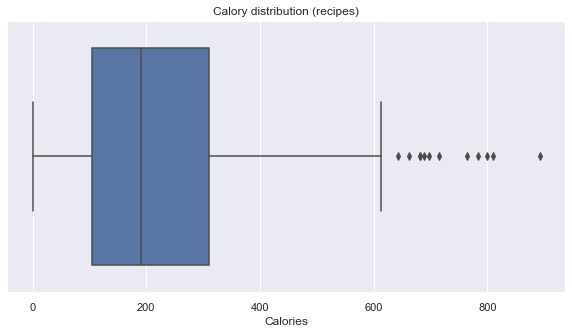

In [6]:
ax = sns.boxplot('calories', data=df_recipe)
ax.set_title('Calory distribution (recipes)')
ax.set_xlabel('Calories');

We remove the outliers using the zscore.

/Users/jelle/.pyenv/versions/3.8.9/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


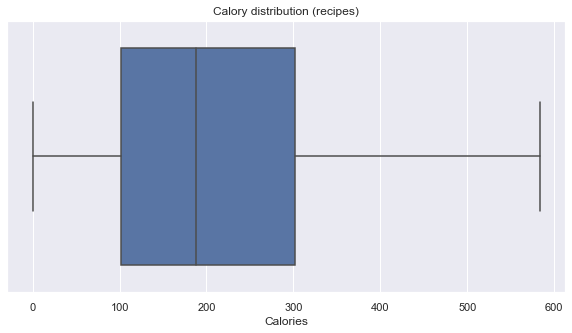

In [7]:
from scipy.stats import zscore

# Remove outliers
df_filtered_recipe = df_recipe[(np.abs(zscore(df_recipe['calories'])) < 2.5)]
ax = sns.boxplot('calories', data=df_filtered_recipe)
ax.set_title('Calory distribution (recipes)')
ax.set_xlabel('Calories');

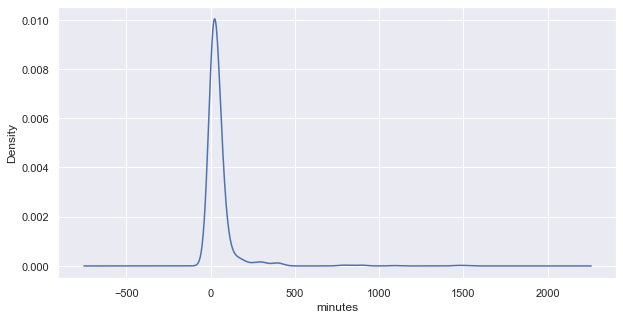

In [8]:
calory_plot = df_recipe.total_min.plot(kind='density')
calory_plot.set_xlabel('minutes');

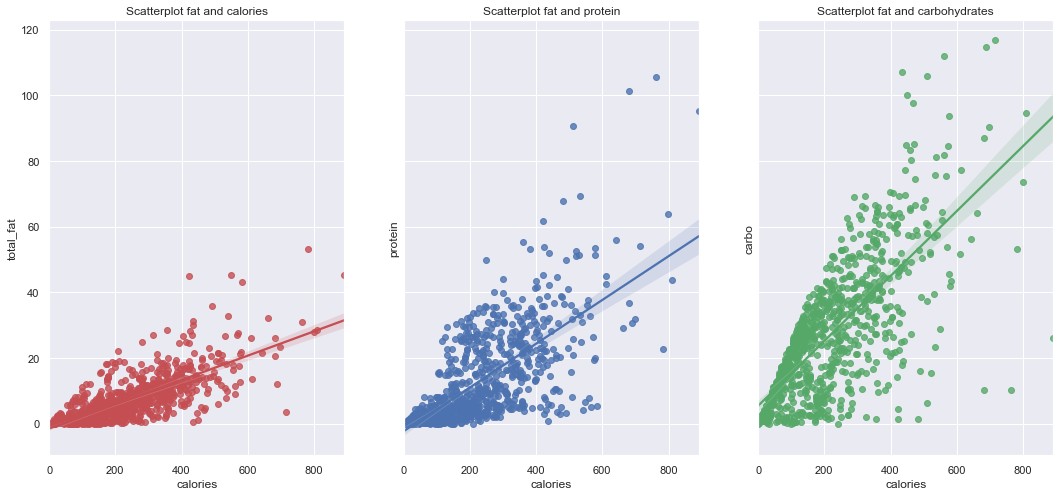

In [9]:
plt.rcParams['figure.figsize'] = 18, 8
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, squeeze=False)
sns.regplot(x='calories', y='total_fat', data=df_recipe, ax=ax[0,0], color="r")
ax[0,0].set_title('Scatterplot fat and calories')
sns.regplot(x='calories', y='protein', data=df_recipe, ax=ax[0,1], color="b")
ax[0,1].set_title('Scatterplot fat and protein')
sns.regplot(x='calories', y='carbo', data=df_recipe, ax=ax[0,2], color="g")
ax[0,2].set_title('Scatterplot fat and carbohydrates');

Next is a histogram of carbohydrates. This might be usefull for people who are on a diet and want a low carb recipe. As you can see there are plenty of options for low carb recipes.

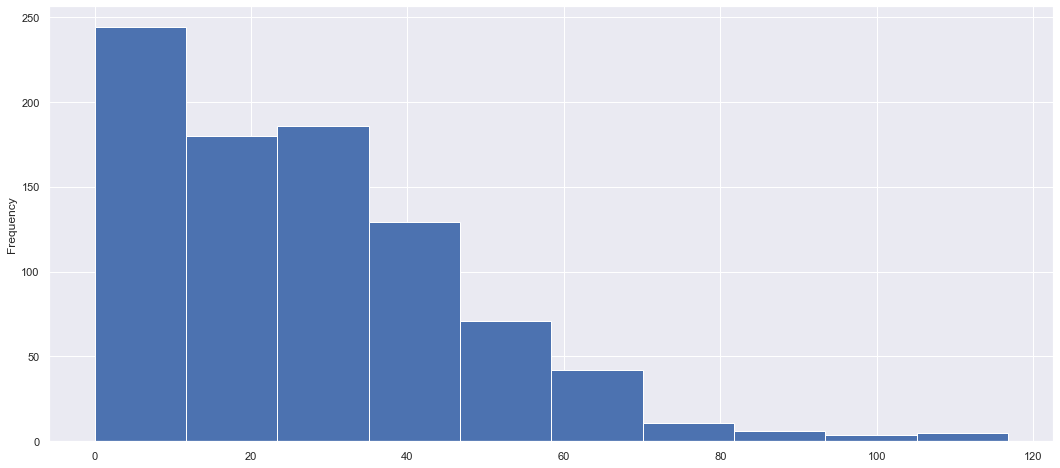

In [10]:
df_recipe.carbo.plot(kind="hist");

Below we see histogram of the carbohydrates per recipe, just like the one above. This one contains a *density plot* (blue line) and a *fitted normal distribution* (black line).

/Users/jelle/.pyenv/versions/3.8.9/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


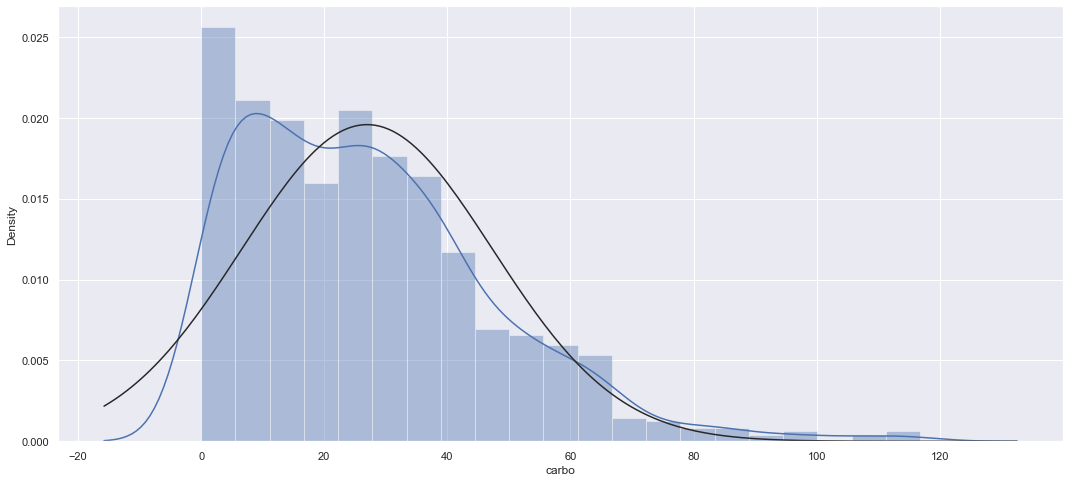

In [11]:
from scipy.stats import norm

sns.distplot(df_recipe['carbo'], fit=norm);